In [218]:
import warnings
warnings.filterwarnings('ignore')

In [219]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In [220]:
df1=pd.read_csv('winequality-red.csv',sep=';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [221]:
df1.shape

(1599, 12)

In [222]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [223]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [224]:
df1.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

##### sulphates,residual sugar,chlorides is more skewed

In [225]:
# df1=df1[(df1['residual sugar']>(np.mean(df1['residual sugar'])-(3*np.std(df1['residual sugar'])))) & (df1['residual sugar']<(np.mean(df1['residual sugar'])+3*np.std(df1['residual sugar'])))]
# df1.shape                                                                                           

In [226]:
# df1.skew() 

skewness is not changed so we made it 3 to 2 sigma

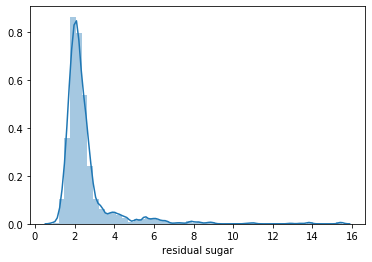

In [227]:
sns.distplot(df1['residual sugar'],bins=50)

#### skew is right side for residual suger so we do from +3 to +2.2 sigma 

In [228]:
dff1=df1[(df1['residual sugar']>(np.mean(df1['residual sugar'])-(3*np.std(df1['residual sugar'])))) & (df1['residual sugar']<(np.mean(df1['residual sugar'])+2.15*np.std(df1['residual sugar'])))]
dff1.shape                                                                                           

(1533, 12)

In [229]:
dff1.skew()

fixed acidity           0.966817
volatile acidity        0.674371
citric acid             0.320193
residual sugar          1.893276
chlorides               5.772238
free sulfur dioxide     1.059120
total sulfur dioxide    1.224729
density                -0.053014
pH                      0.194578
sulphates               2.469386
alcohol                 0.852698
quality                 0.222256
dtype: float64

In [230]:
dff2=dff1[(dff1['chlorides']>(np.mean(dff1['chlorides'])-(3*np.std(dff1['chlorides'])))) & (dff1['chlorides']<(np.mean(dff1['chlorides'])+2.7*np.std(dff1['chlorides'])))]
dff2.shape                                                                                           

(1499, 12)

In [231]:
dff2.skew() 

fixed acidity           0.962052
volatile acidity        0.686709
citric acid             0.300733
residual sugar          1.890657
chlorides               1.769356
free sulfur dioxide     1.053063
total sulfur dioxide    1.233069
density                -0.044152
pH                      0.242255
sulphates               2.327906
alcohol                 0.840462
quality                 0.236361
dtype: float64

In [232]:
dff3=dff2[(dff2['sulphates']>(np.mean(dff2['sulphates'])-(3*np.std(dff2['sulphates'])))) & (dff2['sulphates']<(np.mean(dff2['sulphates'])+3*np.std(dff2['sulphates'])))]
dff3.shape                                                                                           

(1480, 12)

In [233]:
dff3.skew() 

fixed acidity           0.965189
volatile acidity        0.689470
citric acid             0.310420
residual sugar          1.890018
chlorides               1.788740
free sulfur dioxide     1.058590
total sulfur dioxide    1.245492
density                -0.037684
pH                      0.280178
sulphates               0.782323
alcohol                 0.834713
quality                 0.237296
dtype: float64

#### another method to remove outlaier

In [234]:
# e=df1['chlorides'].quantile(0.997)
# df1=df1[df1['chlorides']<e]
# df1.shape

In [235]:
# df1.skew()

In [236]:
# e=df1['residual sugar'].quantile(0.997)
# df1=df1[df1['residual sugar']<e]
# df1.shape

In [ ]:
# df1.skew()

In [237]:
# e=df1['sulphates'].quantile(0.997)
# df1=df1[df1['sulphates']<e]
# df1.shape

In [238]:
# df1.skew()

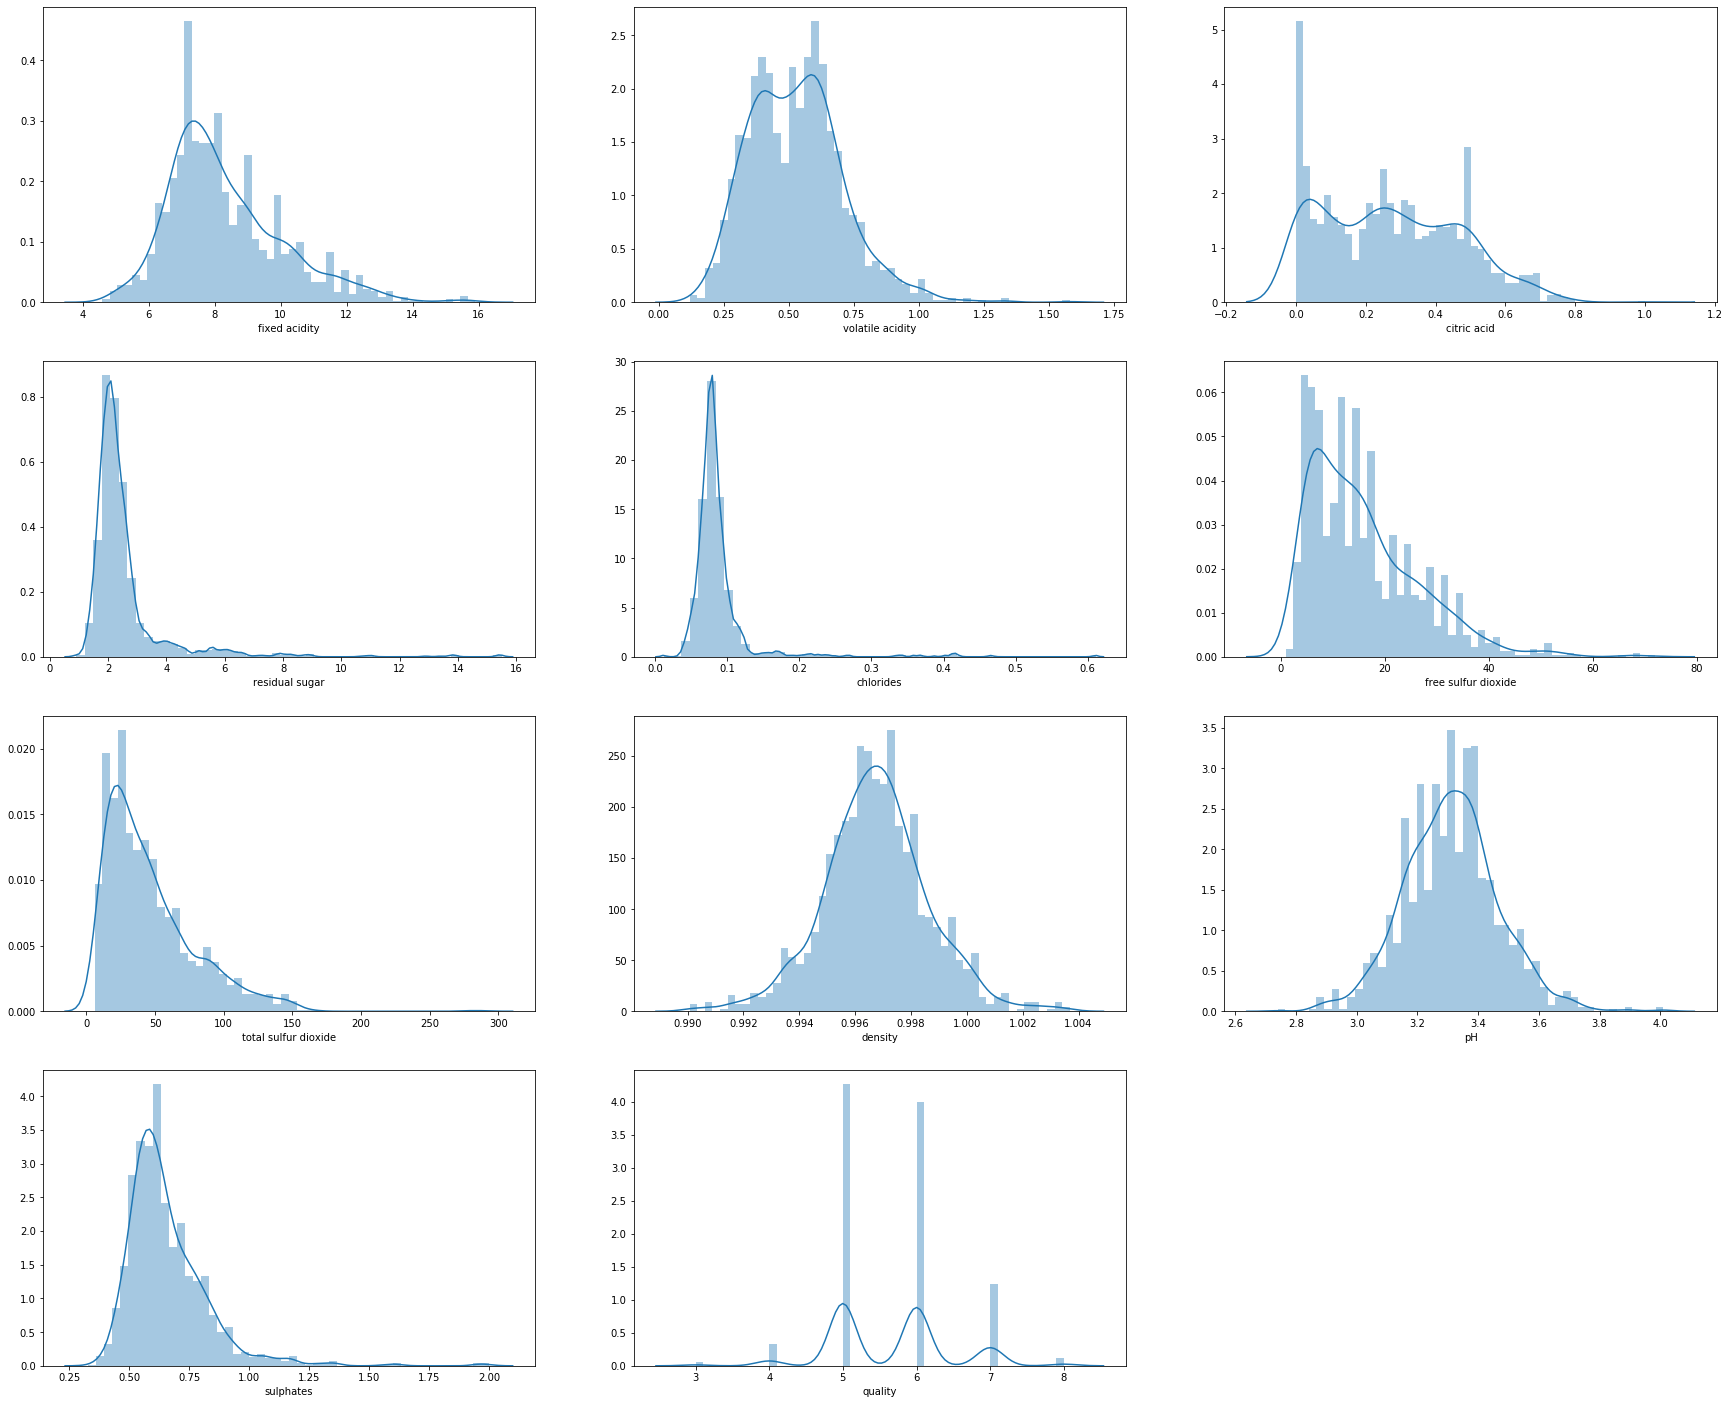

In [239]:
plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
sns.distplot(df1['fixed acidity'],bins=50)


plt.subplot(4,3,2)
sns.distplot(df1['volatile acidity'],bins=50)


plt.subplot(4,3,3)
sns.distplot(df1['citric acid'],bins=50)


plt.subplot(4,3,4)
sns.distplot(df1['residual sugar'],bins=50)

plt.subplot(4,3,5)
sns.distplot(df1['chlorides'],bins=50)


plt.subplot(4,3,6)
sns.distplot(df1['free sulfur dioxide'],bins=50)



plt.subplot(4,3,7)
sns.distplot(df1['total sulfur dioxide'],bins=50)



plt.subplot(4,3,8)
sns.distplot(df1['density'],bins=50)

plt.subplot(4,3,9)
sns.distplot(df1['pH'],bins=50)


plt.subplot(4,3,10)
sns.distplot(df1['sulphates'],bins=50)


plt.subplot(4,3,11)
sns.distplot(df1['quality'],bins=50)


### ph is normally distributed so we take it as target

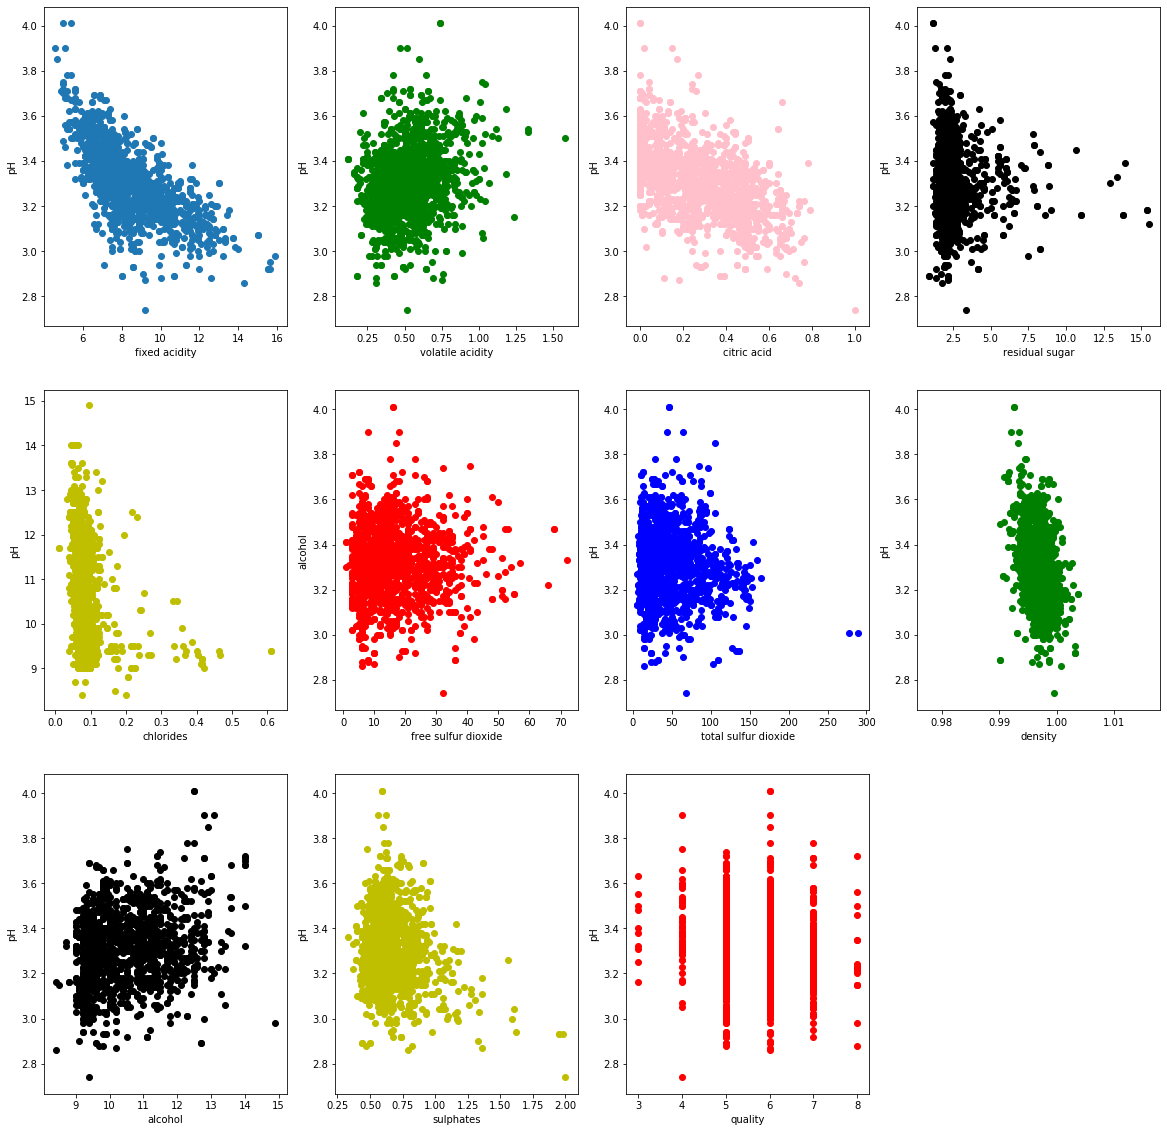

In [246]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
plt.xlabel('fixed acidity')
plt.ylabel('pH')
# plt.title('alcohol v/s fixed acidity ')
plt.scatter(df1['fixed acidity'],df1['pH'])

plt.subplot(3,4,2)
plt.xlabel('volatile acidity')
plt.ylabel('pH')
# plt.title('alcohol v/s volatile acidity ')
plt.scatter(df1['volatile acidity'],df1['pH'],color='g')

plt.subplot(3,4,3)
plt.xlabel('citric acid')
plt.ylabel('pH')
# plt.title('alcohol v/s citric acid ')
plt.scatter(df1['citric acid'],df1['pH'],color='pink')

plt.subplot(3,4,4)
plt.xlabel('residual sugar')
plt.ylabel('pH')
# plt.title('alcohol v/s residual sugar ')
plt.scatter(df1['residual sugar'],df1['pH'],color='black')

plt.subplot(3,4,5)
plt.xlabel('chlorides')
plt.ylabel('pH')
# plt.title('alcohol v/s chlorides ')
plt.scatter(df1['chlorides'],df1['alcohol'],color='y')

plt.subplot(3,4,6)
plt.xlabel('free sulfur dioxide')
plt.ylabel('alcohol')
# plt.title('alcohol v/s free sulfur dioxide ')
plt.scatter(df1['free sulfur dioxide'],df1['pH'],color='r')

plt.subplot(3,4,7)
plt.xlabel('total sulfur dioxide')
plt.ylabel('pH')
# plt.title('alcohol v/s total sulfur dioxide ')
plt.scatter(df1['total sulfur dioxide'],df1['pH'],color='b')

plt.subplot(3,4,8)
plt.xlabel('density')
plt.ylabel('pH')
# plt.title('alcohol v/s density ')
plt.scatter(df1['density'],df1['pH'],color='g')

plt.subplot(3,4,9)
plt.xlabel('alcohol')
plt.ylabel('pH')
# plt.title('alcohol v/s pH ')
plt.scatter(df1['alcohol'],df1['pH'],color='black')

plt.subplot(3,4,10)
plt.xlabel('sulphates')
plt.ylabel('pH')
# plt.title('alcohol v/s sulphates ')
plt.scatter(df1['sulphates'],df1['pH'],color='y')

plt.subplot(3,4,11)
plt.xlabel('quality')
plt.ylabel('pH')
# plt.title('alcohol v/s quality ')
plt.scatter(df1['quality'],df1['pH'],color='r')

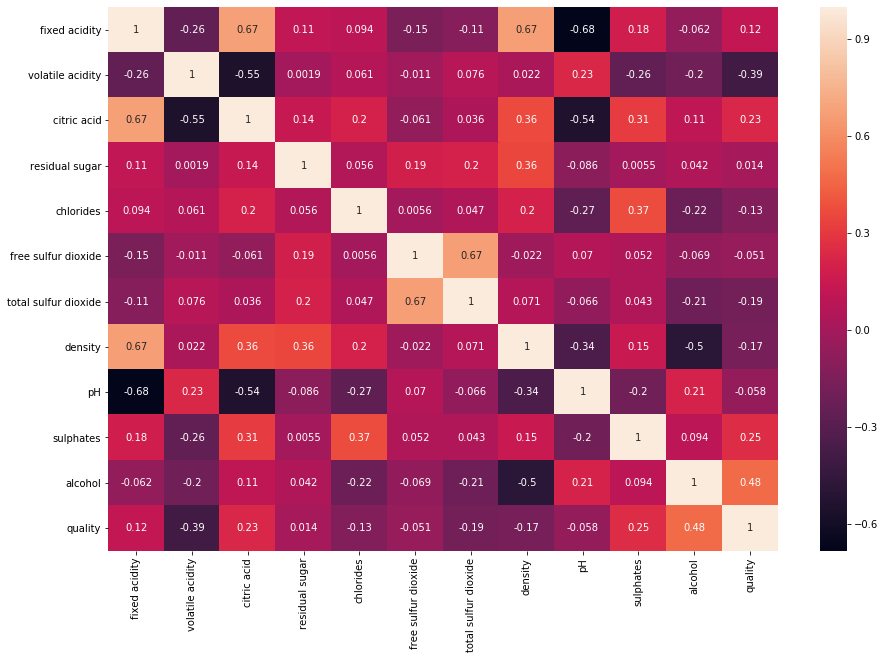

In [243]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

In [247]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(dff3,test_size=0.3,random_state=101)

## StandardScaler

In [248]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [249]:
df_train_scale=pd.DataFrame(sc.fit_transform(df_train),columns=dff3.columns)

In [250]:
df_test_scale=pd.DataFrame(sc.transform(df_test),columns=dff3.columns)

In [251]:
df_train_scale.shape

(1036, 12)

In [252]:
df_test_scale.shape

(444, 12)

In [255]:
X_train=df_train_scale.drop('pH',axis=1)
X_test=df_test_scale.drop('pH',axis=1)

In [256]:
y_train=df_train_scale.pH
y_test=df_test_scale.pH

In [264]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [265]:
lr=LinearRegression()

In [266]:
rfe=RFE(lr,9)
rfe=rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=9, step=1, verbose=0)

In [269]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  ###feed data frame


[('fixed acidity', True, 1),
 ('volatile acidity', False, 3),
 ('citric acid', True, 1),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('sulphates', False, 2),
 ('alcohol', True, 1),
 ('quality', True, 1)]

In [267]:
rfe.ranking_

array([1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [268]:
rfe.support_ ## 9 r true as we give 9 in RFE (# it is list)

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [271]:
selected_col=X_train.columns[rfe.support_] ## it takes all the column names
selected_col

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol',
       'quality'],
      dtype='object')

In [274]:
X_train_rfe=X_train[selected_col] ## it takes all column and made it dataframe
X_train_rfe.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,0.897142,1.184639,3.885145,0.036607,-0.657243,-0.913744,-0.952036,1.931903,1.758701
1,-0.736814,-1.398455,-0.903597,-1.373234,-1.264515,-1.205206,-0.342398,-0.137008,-0.789571
2,-0.962187,-1.398455,0.982877,1.587432,0.557301,-0.460357,-0.189989,-0.137008,-0.789571
3,2.812814,2.555260,0.692650,0.130596,0.759725,-0.071740,1.024030,0.897448,1.758701
4,-0.511440,-1.345739,-0.468257,-0.339351,-0.252395,-0.233664,0.435415,-0.607214,-0.789571


## stats model

In [275]:
import statsmodels.api as sm


In [276]:
X_train_rfe_sm=sm.add_constant(X_train_rfe)

In [277]:
limod=sm.OLS(y_train,X_train_rfe_sm).fit()

In [278]:
print(limod.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     264.4
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          3.71e-260
Time:                        13:20:19   Log-Likelihood:                -848.51
No. Observations:                1036   AIC:                             1717.
Df Residuals:                    1026   BIC:                             1766.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.996e-14 

In [282]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_sm.values,i) for i in range(X_train_rfe_sm.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,density,4.49
1,fixed acidity,3.96
8,alcohol,2.48
2,citric acid,2.19
6,total sulfur dioxide,2.11
5,free sulfur dioxide,1.94
3,residual sugar,1.42
9,quality,1.42
4,chlorides,1.21
0,const,1.00


In [284]:
X_train_rfe_sm.drop('citric acid',axis=1,inplace=True)

In [285]:
limod1=sm.OLS(y_train,X_train_rfe_sm).fit()

In [286]:
print(limod1.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     296.7
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          7.74e-261
Time:                        13:28:11   Log-Likelihood:                -849.84
No. Observations:                1036   AIC:                             1718.
Df Residuals:                    1027   BIC:                             1762.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.011e-14 

In [287]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_sm.values,i) for i in range(X_train_rfe_sm.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,density,4.48
1,fixed acidity,2.68
7,alcohol,2.43
5,total sulfur dioxide,2.03
4,free sulfur dioxide,1.92
2,residual sugar,1.42
8,quality,1.41
3,chlorides,1.21
0,const,1.00


In [288]:
X_train_rfe_sm.head()

,const,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,1.0,0.897142,3.885145,0.036607,-0.657243,-0.913744,-0.952036,1.931903,1.758701
1,1.0,-0.736814,-0.903597,-1.373234,-1.264515,-1.205206,-0.342398,-0.137008,-0.789571
2,1.0,-0.962187,0.982877,1.587432,0.557301,-0.460357,-0.189989,-0.137008,-0.789571
3,1.0,2.812814,0.692650,0.130596,0.759725,-0.071740,1.024030,0.897448,1.758701
4,1.0,-0.511440,-0.468257,-0.339351,-0.252395,-0.233664,0.435415,-0.607214,-0.789571


In [289]:
y_train_sm_pred=limod1.predict(X_train_rfe_sm)

In [291]:
error_training=y_train-y_train_sm_pred

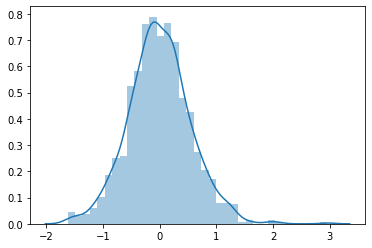

In [292]:
sns.distplot(error_training)

## to check accuracy

In [293]:
from sklearn.metrics import r2_score

In [294]:
r2_score(y_train,y_train_sm_pred)

0.697980858669144

## FOR TEST DATA

In [295]:
# ADD CONSTANT TO TEST DATA
X_test_sm=sm.add_constant(X_test)

In [298]:
# IT CHOOSE COLUMN FROM TRAINED DATA FOR TEST DATA ANAYSIS
X_test_sm=X_test_sm[X_train_rfe_sm.columns]
X_test_sm.head()

,const,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,1.0,-0.624127,-0.613370,0.741527,-0.151183,-0.233664,0.051764,-1.359545,0.484565
1,1.0,0.277366,1.418217,0.506554,1.063361,0.219722,0.813810,0.051075,0.484565
2,1.0,2.362067,0.112197,-0.809298,-1.062091,-0.589896,1.707244,0.427241,-0.789571
3,1.0,-0.962187,-1.193824,-0.997276,0.152453,-0.622281,-0.762838,-0.607214,0.484565
4,1.0,0.108336,-0.831040,-0.480335,2.986388,1.385573,-0.741816,1.273613,1.758701


In [303]:
y_pred_test_sm=limod1.predict(X_test_sm)
y_pred_train_sm=limod1.predict(X_train_rfe_sm)

In [304]:
from sklearn.metrics import r2_score

In [305]:
r2_score(y_test,y_pred_test_sm)

0.6929620599671986

## linear regression

In [307]:
lr=LinearRegression()

In [309]:
lr.fit(X_train_rfe_sm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
y_pred_lr=lr.predict(X_test_sm)

In [311]:
r2_score(y_test,y_pred_lr)

0.6929620599671986